# Heart Disease Prediction Model 
This notebook looks into using the various python based ML and data science libraries in an attempt to build a ML modal capable of predicting whether 
or not someone has heart disease based on their medical attributes.

**We are going to take the following approach:** 

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 
>We are using Heart disease UCI dataset which is also available on Kaggle.

>[View data](https://archive.ics.uci.edu/dataset/45/heart+disease)

>[View raw data](https://raw.githubusercontent.com/FahadIqbal12/zero-to-mastery-ml/master/data/heart-disease.csv)

## 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we'll persue the project. 


## 4. Features: 

Data Dictionary:
- age
- )
sex (Male/Fema
  l- e):
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomat
- i- c])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospi
- t- al))
chol (serum cholesterol in g/dl)
- 
fbs (if fasting blood sugar > 120 )
 
-  mg/dl)
restecg (resting electrocardiographic p
   -  rtrophy]
thalach: maximum heart ra
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopyt- thal: normal fixed defect;
- target: predicted attribute a.i. .v.edicted attribute


### Preparing Tools 
We're going to use pandas, matploltlib, and numpy for data analysis and manipulation

In [1]:
# regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# models from scikit learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay


### Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FahadIqbal12/zero-to-mastery-ml/master/data/heart-disease.csv')
df.shape

(303, 14)

### Data Exploration (EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working on.

1. What problem are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# let's find out how many each class there 
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

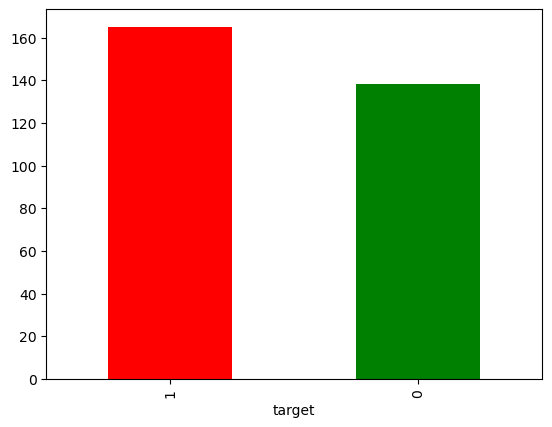

In [4]:
df["target"].value_counts().plot(kind='bar', color=["red","green"])

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# is there any missing values.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns
#### Heart disease frequency according to sex 

In [8]:
# compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


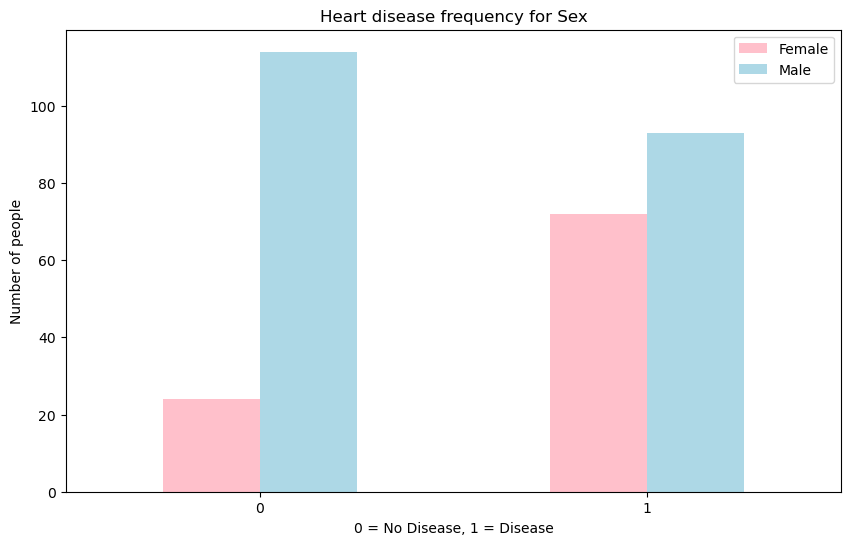

In [9]:
# create a plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6), color=['pink','lightblue'])
plt.title("Heart disease frequency for Sex") 
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

#### Age vs Max Heart rate for Heart disease 

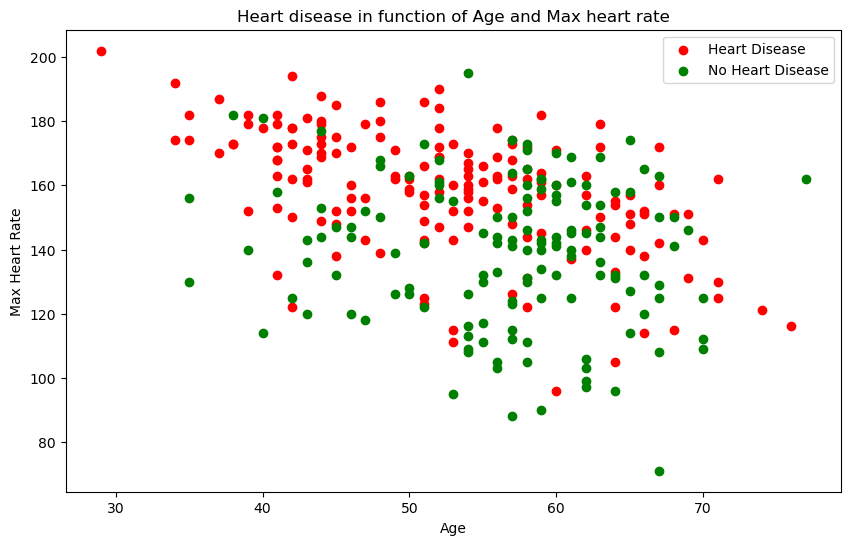

In [10]:
# create another figure 
plt.figure(figsize=(10,6))

# scatter with positive examples 
plt.scatter(df.age[df.target == 1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target == 0],df.thalach[df.target==0],c=['green'])
plt.title('Heart disease in function of Age and Max heart rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"])

<Axes: ylabel='Frequency'>

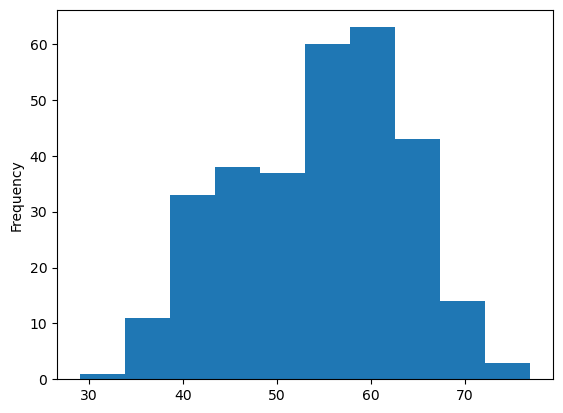

In [11]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist()

#### Heart disease frequency per Chest pain type 

* cp:chest pain type
  * 0: typical angina
  * 1: atypical angina
  * 2: non-anginal
  * 3: asymptomatic

In [12]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


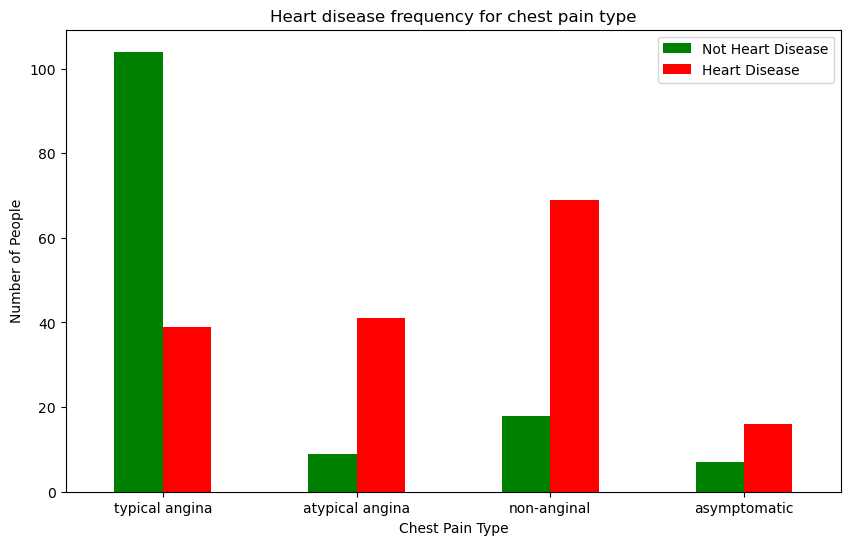

In [13]:
# make the cross tab more visual 
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=["green","red"])
plt.title("Heart disease frequency for chest pain type") 
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of People")
plt.legend(["Not Heart Disease","Heart Disease"])
plt.xticks(ticks=[0,1,2,3],labels=["typical angina","atypical angina","non-anginal","asymptomatic"],rotation=0);


In [14]:
# make a correlation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


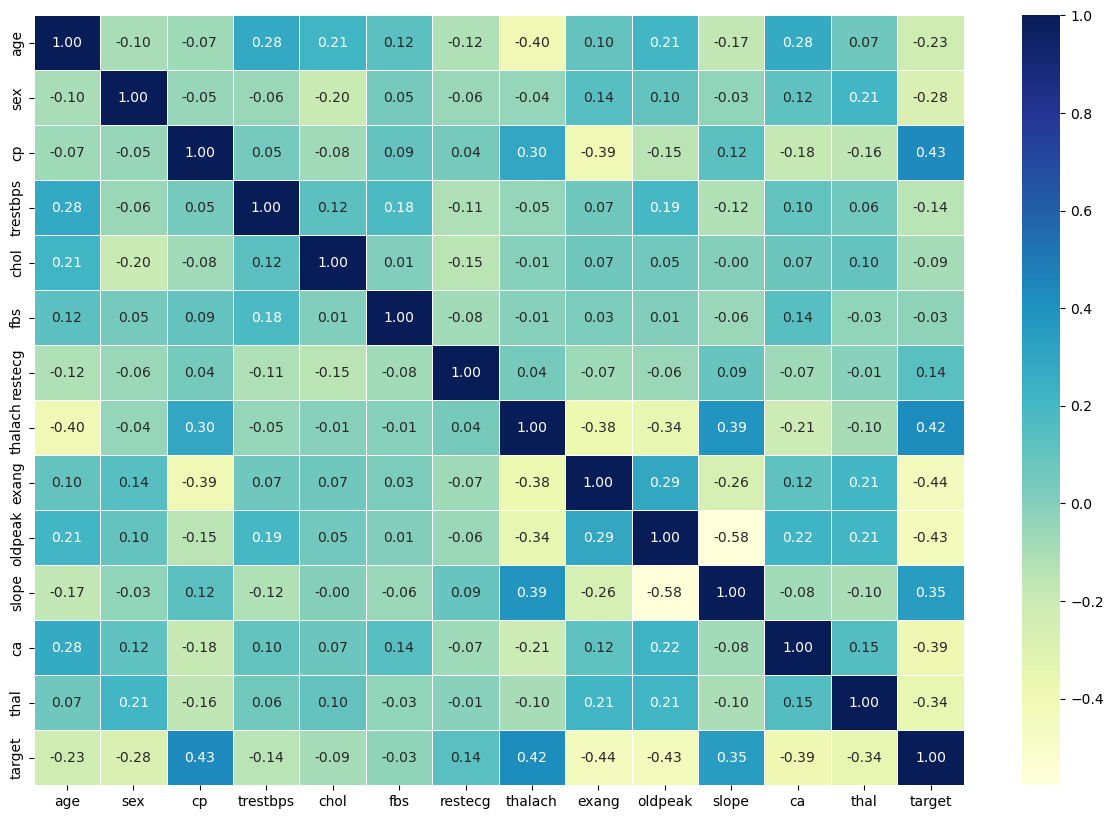

In [15]:
# lets make our correlation matrix more visual 
corr_matrix = df.corr() 
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

### 5. Modelling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# split data into X and y 
X = df.drop('target',axis=1)
y = df["target"]

In [18]:
# split data into train and test sets 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [20]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and testing sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (using the patterns) on the test set. 

**We're going to try 3 different ML models:**

1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest classifier

In [21]:
# Put models in a dict 
models = {"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest": RandomForestClassifier()}

# create a function to fit and score models 
def fitandscore(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models:
    models: a dict of different Scikit learn ML model 
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_trian: training data (with labels)
    y_test: testing data (with labels)
    """
    # set random seed 
    np.random.seed(42)
    # make a dict to keep model scores 
    model_scores={} 
    # loop through models 
    for name,model in models.items():
        # fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_score 
        model_scores[name]= model.score(X_test,y_test)
    return model_scores
    


In [23]:
model_scores = fitandscore(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\ml\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

In [24]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [25]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


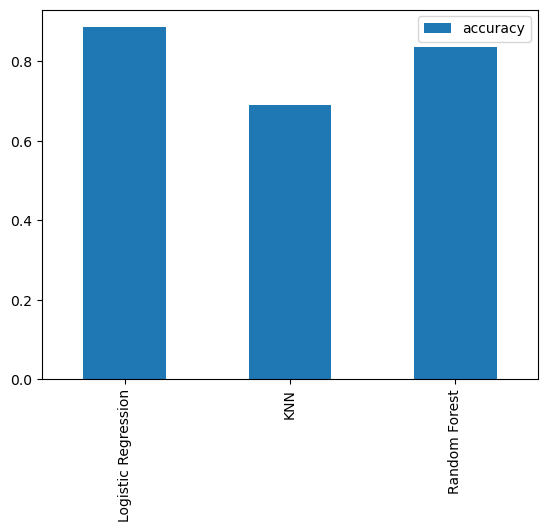

In [26]:
model_compare.T.plot(kind='bar');

Now we've got a baseline model... and we know a model's first predictions aren't always what we should prefer

#### Tuning/improving the model:

**Lets look at the following:** 

* Hyperparameter tuning 
* Features importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [29]:
# Let's tune KNN 

train_scores = []
test_scores = []

# create a list of different values for n_neighbours 
neighbours = range(1,21)

# setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbours 
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train,y_train)
    # update the training scores list 
    train_scores.append(knn.score(X_train,y_train))
    #update the test score list 
    test_scores.append(knn.score(X_test,y_test))
    

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


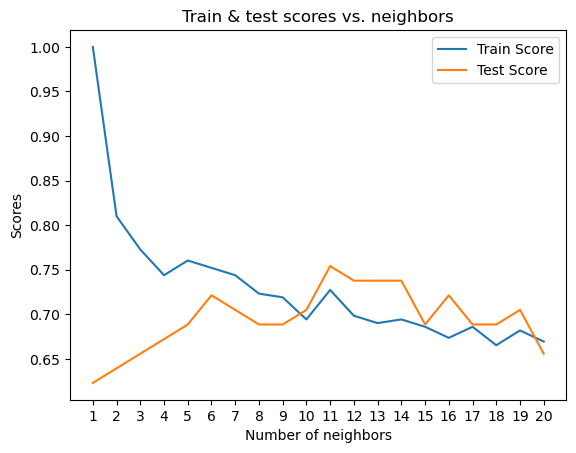

In [45]:
plt.plot(neighbours,train_scores,label="Train Score")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Scores")
plt.legend(["Train Score","Test Score"])
plt.title("Train & test scores vs. neighbors")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameters tuning with RandomizedCVSearch

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedCVSearch

In [56]:
# create a hyperparameter grid for LogisticRegression() 
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":['liblinear']}

# create a hyperparameter grid for RandomForestClassifier() 
rf_grid ={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [50]:
# Tune LogisticRegression() 
np.random.seed(42) 

#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True) 

# fir random hyperparamete search model for Logisticregression 
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [57]:
# Tune RandomForestClassifier
np.random.seed(42) 

# setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True) 

# fit random hyperparameter search model for RandomForestClassifier() 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [60]:
rs_rf.score(X_test,y_test)

0.8688524590163934

<hr/>

**Methods for hyperparameter tuning:**

* by hand 
* RandomizedSearchCV
* GridSearchCV

### Hyperparameters tuning with GridSearchCV

Since our LogisticRegession model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [61]:
# different hyperparameters for our LogisticRegression model 
log_reg_grid = {"C":np.logspace(-4,4,30),"solver":['liblinear']}

In [62]:
# setup grid hyperparameters search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

# fit our grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [63]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [64]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned ML classifier, beyond accuracy  

* ROC curve and AUC score  
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

... and it would be great if cross validation was used where possible. 

TO make comparisons and evaluate our trained model, first we need to make predictions.

In [67]:
# make predictions with tuned model 
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

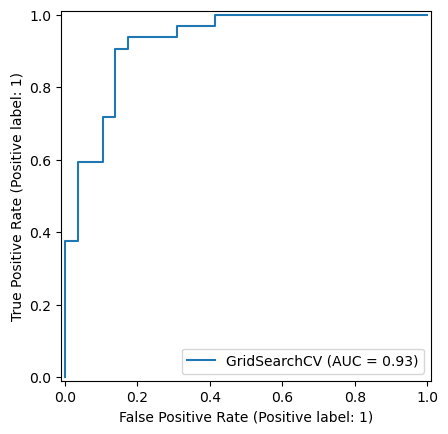

In [69]:
# Plot roc curve and calculate auc metric 
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [70]:
# Confusion Matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


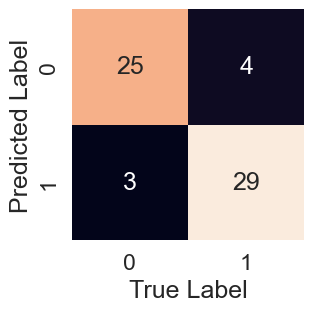

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False) 
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label") 

plot_conf_mat(y_test,y_preds)
    

In [74]:
# classification_report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<hr/>

#### Calculate evaluation metrics using cross validation 

We're going to calculate accuracy,precision, recall and f1 score of our model using cross validation and to do so we'll be using `cross_val_score()`

In [75]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
# create a new classifier with best parameters 
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [84]:
# cross validated accuracy 
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [85]:
# cross validated precision
cv_precision = cross_val_score(clf,X,y,scoring="precision")
cv_precision  = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [86]:
# cross validated recall 
cv_recall = cross_val_score(clf,X,y,scoring="recall") 
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [88]:
# cross validated f1_score 
cv_f1_score = cross_val_score(clf,X,y,scoring="f1") 
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

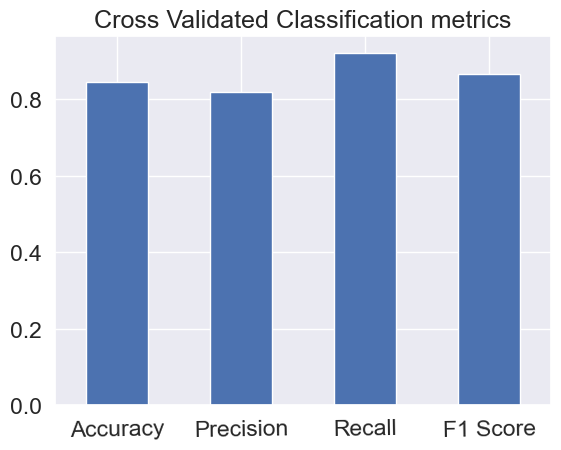

In [98]:
# Visualize our cross validated metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1 Score":cv_f1_score},index=[0])
cv_metrics.T.plot(kind='bar',legend=False)
plt.title("Cross Validated Classification metrics")
plt.xticks(rotation=1);

### Feature Importance 

Feature importance is another as asking, "which features contributed most to outcomes of the model and how did they contribute?"

Finding feature importance is different for each ML model.



In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
# fit an instance of LogisticRegression()
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [112]:
# check coef() 
clf.coef_[0]

array([ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
        0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
        0.45051632, -0.63609908, -0.67663375])

In [105]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<Axes: title={'center': 'Feature Importance'}>

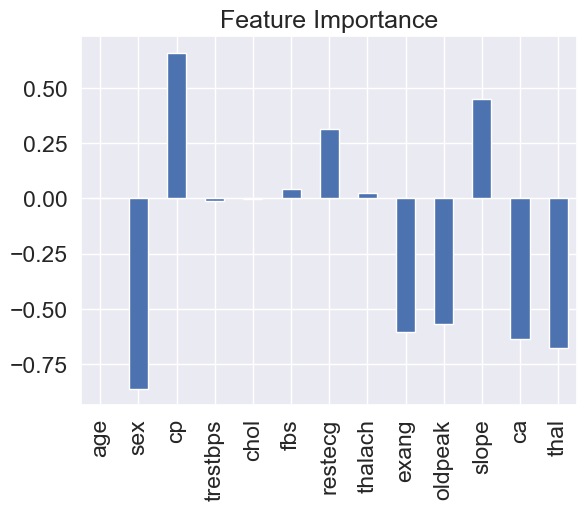

In [109]:
# visualize feature importance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',legend=False,title="Feature Importance")

In [110]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [111]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
